<a href="https://colab.research.google.com/github/shadabsgit/EDA-Capstone-Project/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

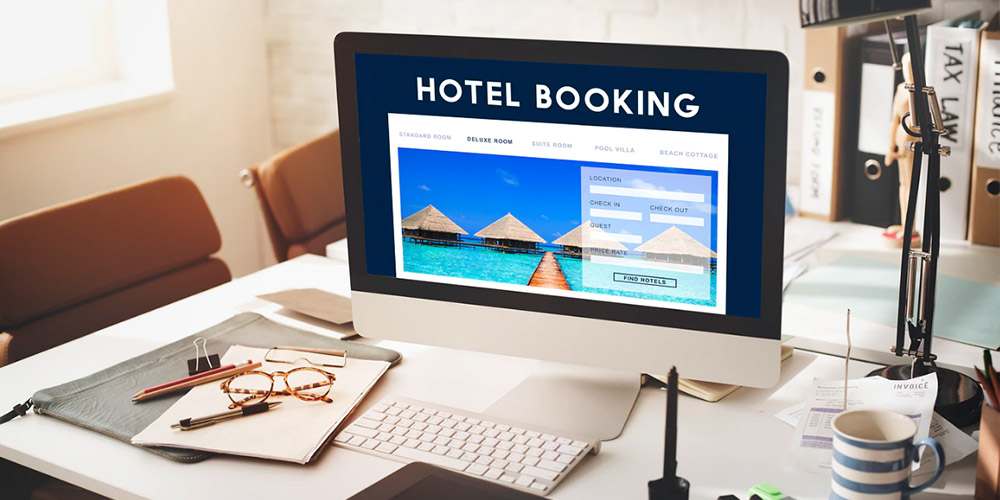

#**Data Initialization**

#1. Importing Libraries and Loading Dataset 
#### The first and formost task for any Exploratory Data Analysis is importing all the necessary libraries needed and loading the dataset to our iPython Notebook for the same.

---



###1.1 Importing Libraries
#### Here we import the libraries required for our EDA

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization
%matplotlib inline

###1.2 Loading Dataset
#### Here we use the command pd.read_csv() to read the csv file and load it to our notebook

In [2]:
url = 'https://drive.google.com/file/d/1C9AxF9fcVzMw0Bgs0NaRrNML2WwX1Ehm/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

# 2. Viewing And understanding the Dataset
#### Before we start working with the data and proceeding with cleaning and later analysis, it is important for us to understand our data properly, so that it is easily workable and the following procedure is fluid.

###2.1 Retrieve first few rows of dataframe using pandas '.head()' method.
#### This gives us the overview of our data and makes us able to read what columns are present in our dataset and what kind of data they contain.

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


###2.2 Checking the shape of our dataset using'.shape()' method
#### This give us the exact number of rows and columns present in our dataset

#### We can observe that our dataset has 119390 rows and 32 columns

In [4]:
df.shape

(119390, 32)

###2.3 Use pandas 'info()' method that prints information about the DataFrame. 
####The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

#### We can see that shape of dataframe is (11930,32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

###2.4 Getting the description of all numeric data using '.describe()' method
####This gives us a breif description of all the columns containing numeric data. Here we get the aggrigate values of all the numeric columns present in our dataset.

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


###2.5 Check if any missing value(NULL,NaN,NA) is present in the data using  'isna()' function.
#### This is important to know as these values can lead to serious inconsistencies and may make our job more tidious.

#### We can see data is missing for country, agent, comapany.


In [7]:
df.isna().sum(axis = 0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# **Data Analysis**

#3. Data Cleaning
#### This step involves various data cleaning actions involved to make the data more easily workable. These actions include removing null values, changing datatypes of certain columns, removing outliers etc.

###3.1 Removing null values using '.drop()' and 'dropna()' method
#### As we have seen, missing values are present in a significant amount for 'agent' and 'company'. We will delete both columns using drop() method and for 'country' as missing values are very less we will drop missing values using dropna() method.

#### Print updated dataframe to check if all missing values are 0

In [8]:
df= df.drop(columns=['agent', 'company'])

df = df.dropna()

print(df.isna().sum(axis=0))


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

###3.2 Datatype corrections

####3.2.1 Checking datatypes using '.dftypes()' function.
#####We will use '.dftypes()' method to check the datatypes of all columns

In [9]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

####3.2.2 Changing datatype using '.astype()' function.
#####From above we can see that the 'children' column. Since these values should be countable, it is better if they are formatted into 'int' datatype rather than float. We can change this by using '.astype()' function 

In [10]:
df[['children']] = df[['children']].astype('int64')

###3.3 Outlier treatment
#### Outliers are the values in the dataset that lie outside the range of statistically average values. Usually these can be observed because their massive gap and fluctuation from other values in the dataset The standard practice is to get rid of these outliers so the further processes are smooth and consistant,

####3.3.1 Outlier Visualisation using box plots.
#####We can use box plot to visualise the outliers present in certain tables.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


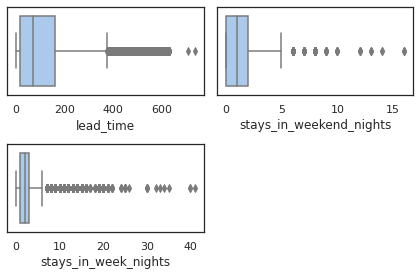

In [11]:
cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights']
index = 1

sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('pastel')

for i in cols:
  plt.subplot(2,2,index)
  index+=1
  sns.boxplot(df[i])
  plt.tight_layout()
  
plt.show()

####3.3.2 Outlier removal
##### As seen from the above plots we can now easily take action to remove these outliers present in our dataset.

In [12]:
df.loc[df.lead_time > 380, 'lead_time'] = 380
df.loc[df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df.loc[df.stays_in_week_nights > 7, 'stays_in_week_nights'] = 7

###3.4 Data after Cleaning

####Now let us get a breif description of our data after the necessary cleaning steps have been taken.

In [13]:
## creating copy of original dataframe for future use
df_copy = df.copy()
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,102.694335,2016.157656,27.166555,15.800880,0.924187,2.436139,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,101.648282,0.707459,13.589971,8.780324,0.967762,1.601916,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,380.000000,2017.000000,53.000000,31.000000,5.000000,7.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


#4. Data Visualisation
#### Here we try to visualise different columns,the properties and variations of its data, their relation with each others, etc.
#### We will use different types of plots for e.g, count plots,bar and pie charts, etc. And also catagorise them accordingly

###4.1 Correlation plot.
#### Here we plot the heatmap that helps us visualise the correlation between all the different numerical data columns present dataset.
#### We are taking a look at all the factors that are directly prevalant to the hotel businesses and their relationship with each other.
#### For the sake of simplicity we first create a sub dataset containing all the required numerical data columns present in our data in order to plot the heatmap.

In [14]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [15]:
# First let's make a sub-dataset within which we include the parameters we want to visualise
sub_df = df[['lead_time', 'arrival_date_year', 'stays_in_weekend_nights', 'adults', 
             'children', 'babies','stays_in_week_nights','country', 'previous_cancellations',
             'previous_bookings_not_canceled','booking_changes',
            'days_in_waiting_list', 'adr', 'total_of_special_requests',
            'reservation_status', 'reservation_status_date']]

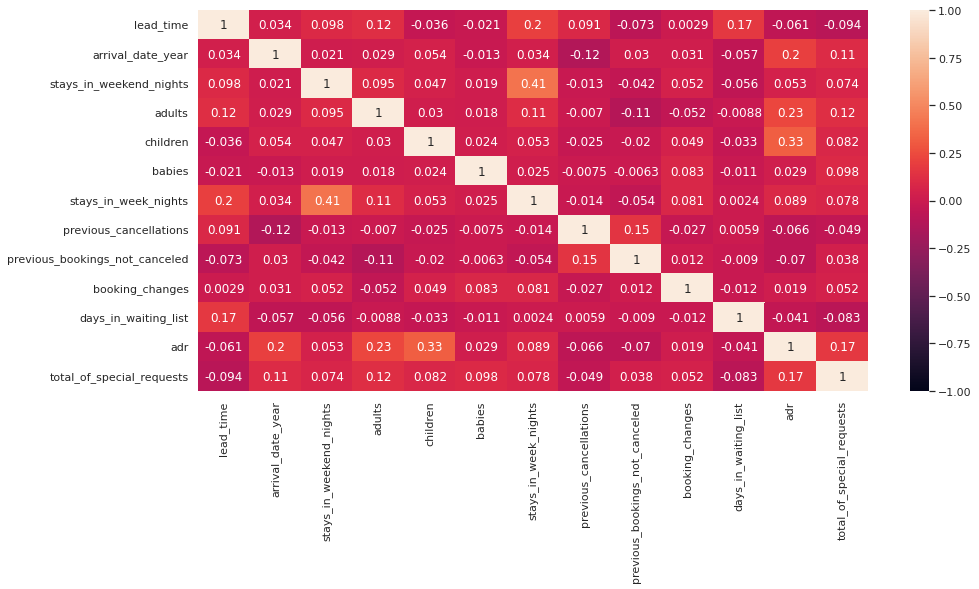

In [16]:
plt.figure(figsize=(15,7))
sns.heatmap(sub_df.corr(), vmin=-1, cmap='rocket', annot=True)

###4.2 Univariate Analysis
#### Here we analyse the columns one at a time and visualise the trends of data in them.

#### 4.2.1 Hotel Type
##### Use value_count() method to overview of hotel type where customers are staying.

###### We can see that around 66% customers booked 'City Hotel' and 33% booked 'Resort Hotel'.

In [17]:
df['hotel'].value_counts(normalize = True)

City Hotel      0.666975
Resort Hotel    0.333025
Name: hotel, dtype: float64

##### Visualizing Hotel Type using countplot:

###### As we can see from the plot below, people are more interested in staying at city hotels instead of resort hotels, and there are approximately 50% fewer bookings at resort hotels as compared to city hotels.


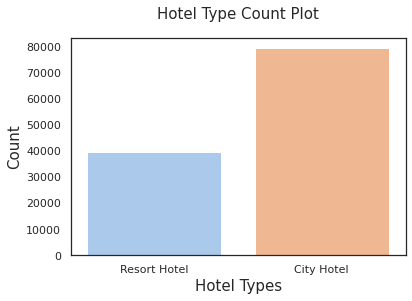

In [18]:
sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('pastel')

g = sns.countplot(x='hotel',data=df)

g.set_xlabel('Hotel Types',fontsize = 15)
g.set_ylabel('Count',fontsize = 15)
g.set_title('Hotel Type Count Plot', fontsize = 15, y = 1.06)

plt.show()

####4.2.2 Canceled Booking
##### Use value_count() method to overview of hotel cancellations

##### We can see that around 37% customers canceled their booking.

In [19]:
df['is_canceled'].value_counts(normalize = True)

0    0.628648
1    0.371352
Name: is_canceled, dtype: float64

##### Visualizing Cancelation using countplot:

#####As we can see from the count plot below that majority of the bookings were not cancelled, but still there is little amount of bookings cancelled.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


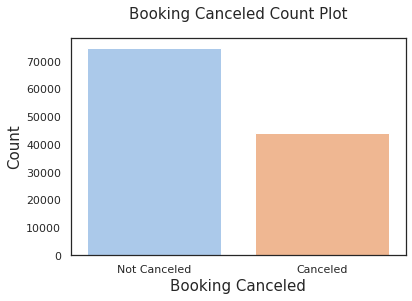

In [20]:
sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('pastel')

df['is_canceled'] = df.is_canceled.replace([1,0], ['Canceled', 'Not Canceled'])
booking_canceled_data = df['is_canceled']
g = sns.countplot(booking_canceled_data)

g.set_xlabel('Booking Canceled',fontsize = 15)
g.set_ylabel('Count',fontsize = 15)
g.set_title('Booking Canceled Count Plot', fontsize = 15, y = 1.06)

plt.show()

####4.2.3 Arrival Date Month
##### Use value_count() method to overview of customer arrival by Month.

##### We can see that around 11% customers preffered August and only 4% customers preffered January.

In [21]:
df['arrival_date_month'].value_counts(normalize = True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: arrival_date_month, dtype: float64

##### Visualizing Arrival Date Month using countplot:
 
##### As we can see from below plot which months are the most popular among guests visiting hotels. Highest bookings recorded in months August, July, May and October. Least bookings recorded in January, December and November.

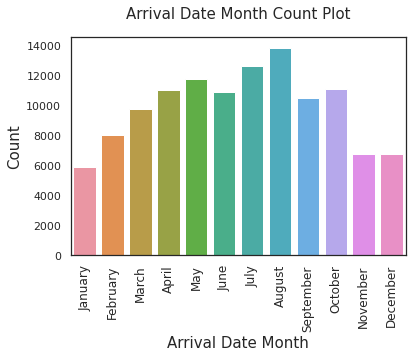

In [22]:
sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('husl')

g = sns.countplot(x='arrival_date_month',data=df, order=["January","February","March","April","May","June","July","August","September","October","November","December"])

g.set_xlabel('Arrival Date Month',fontsize = 15)
g.set_ylabel('Count',fontsize = 15)
g.set_title('Arrival Date Month Count Plot', fontsize = 15, y = 1.06)

plt.xticks(rotation = 90, fontsize = 12)
plt.show()

#### 4.2.4 Country
##### Use value_count() method to overview of customer arrival by Country.

##### We can see that around 41% of customers from Portugal, 10% from Great Britain and 8% from France.

In [23]:
df['country'].value_counts(normalize = True)

PRT    0.408636
GBR    0.102012
FRA    0.087596
ESP    0.072062
DEU    0.061288
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: country, Length: 177, dtype: float64

##### Visualizing Country of customer arrival using countplot:
 
### As we can see from below plot that Most Customers are from Portugal, Great Britain, France and Spain.

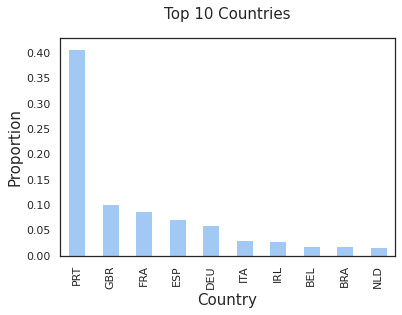

In [24]:
sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('pastel')
 
df['country'].value_counts(normalize = True)[0:10].plot(kind = 'bar')

plt.xlabel('Country',fontsize = 15)
plt.ylabel('Proportion',fontsize = 15)
plt.title('Top 10 Countries', fontsize = 15, y = 1.06)

plt.show()


#### 4.2.5 Deposit Type

##### Use value_count() method to overview of booking deposit type.

##### We can see that around 87% customers made no deposit, 12% of deposit was non refundable.

In [25]:
df['deposit_type'].value_counts(normalize=True)

No Deposit    0.876070
Non Refund    0.122567
Refundable    0.001363
Name: deposit_type, dtype: float64

##### Visualizing Deposit Type using countplot:

#####As we can see from the count plot below that most customers did not made any initials deposits during booking time

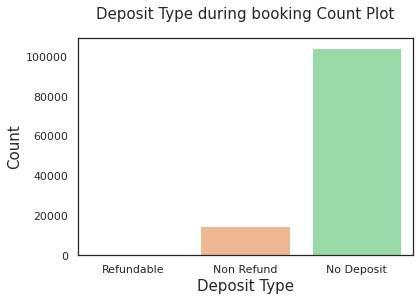

In [26]:
sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('pastel')

g = sns.countplot(x ='deposit_type', data = df, order = ['Refundable','Non Refund','No Deposit'])

g.set_xlabel('Deposit Type',fontsize = 15)
g.set_ylabel('Count',fontsize = 15)
g.set_title('Deposit Type during booking Count Plot', fontsize = 15, y = 1.06)

plt.show()

#### 4.2.6 Total Guests

##### Use value_count() method to overview Total Guests, which includes Adults, children and babies.

##### We can see that more than 68% guests have only 2 members, around 18% are traveling alone. Some are travelling in groups more than 30.

In [27]:
df['total_guests'] = (df['adults'] + df['children'] + df['babies'])
df = df.astype({'total_guests':'int32'})
df['total_guests'].value_counts(normalize = True)

2     0.688658
1     0.187463
3     0.088134
4     0.033020
0     0.001430
5     0.001152
26    0.000042
12    0.000017
27    0.000017
20    0.000017
10    0.000017
40    0.000008
50    0.000008
55    0.000008
6     0.000008
Name: total_guests, dtype: float64

##### Visualizing Total Guests Size using countplot:

#####As we can see from the count plot below that most most guest are travelling in group of 2 or solo.

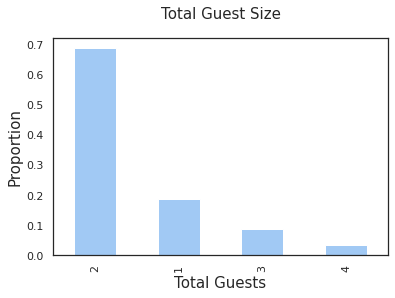

In [28]:
sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('pastel')
 
df['total_guests'].value_counts(normalize = True)[0:4].plot(kind = 'bar')

plt.xlabel('Total Guests',fontsize = 15)
plt.ylabel('Proportion',fontsize = 15)
plt.title('Total Guest Size', fontsize = 15, y = 1.06)

plt.show()

#### 4.2.7 Customer Types

##### Use value_count() method to overview different Customer Types.

##### We can see Four different customer types:

*   Transient
*   Contract
*   Transient-Party
*   Group

In [29]:
df['customer_type'].value_counts(normalize = True)

Transient          0.750004
Transient-Party    0.210920
Contract           0.034281
Group              0.004794
Name: customer_type, dtype: float64

##### Visualizing different Customer Types using countplot:

#####As we can see from the below Count Plot that Most of the customers are Transient around 75%, 21% Transient-Party customers, 3.4% Contract type and  around 0.47% customers are Group type.

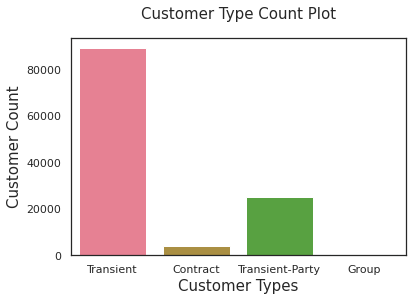

In [30]:
sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('husl')

g = sns.countplot(x ='customer_type', data = df)

g.set_xlabel('Customer Types',fontsize = 15)
g.set_ylabel('Customer Count',fontsize = 15)
g.set_title('Customer Type Count Plot', fontsize = 15, y = 1.06)

plt.show()

####4.2.8 Booking Changes

##### Use value_count() method to overview Booking Changes by Customer.

##### We can see that around 84% customers have not made any changes and around 16% customers made booking changes.

In [31]:
df['booking_changes'].value_counts(normalize = True)

0     0.848643
1     0.106301
2     0.031876
3     0.007780
4     0.003154
5     0.000992
6     0.000530
7     0.000261
8     0.000143
9     0.000067
10    0.000050
13    0.000042
14    0.000042
15    0.000025
16    0.000017
17    0.000017
12    0.000017
11    0.000017
20    0.000008
21    0.000008
18    0.000008
Name: booking_changes, dtype: float64

##### Visualizing Booking Changes using countplot:

#####As we can see from the below Count Plot that 97% customers do not prefer to visit again.

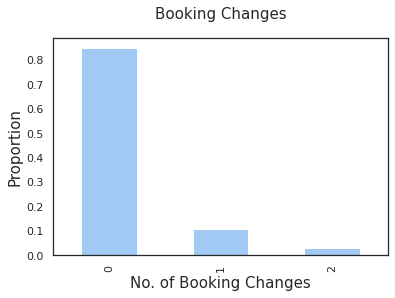

In [32]:
sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('pastel')

df['booking_changes'].value_counts(normalize = True)[:3].plot(kind = 'bar')

plt.xlabel('No. of Booking Changes',fontsize = 15)
plt.ylabel('Proportion',fontsize = 15)
plt.title('Booking Changes', fontsize = 15, y = 1.06)

plt.show()


#### 4.2.9 Reserved Room Type

##### Use value_count() method to overview Reserved Room Type .

##### We can see that around 71% room type is 'A', 16% is 'D' and 5% is 'E'.

In [33]:
df['reserved_room_type'].value_counts(normalize = True)

A    0.719953
D    0.161256
E    0.054643
F    0.024307
G    0.017519
B    0.009369
C    0.007830
H    0.005055
L    0.000050
P    0.000017
Name: reserved_room_type, dtype: float64

##### Visualizing Reserved Room Type using countplot:

#####As we can see from the below Count Plot that 71% customers prefer type 'A' and 16% prefer type 'D'.

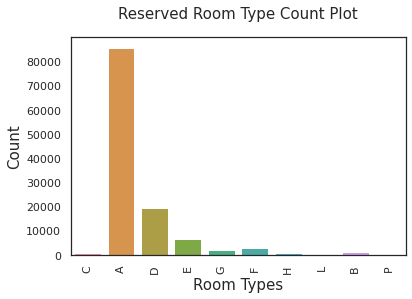

In [34]:
sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('husl')

g = sns.countplot(x ='reserved_room_type', data = df)

g.set_xlabel('Room Types',fontsize = 15)
g.set_ylabel('Count',fontsize = 15)
g.set_title('Reserved Room Type Count Plot', fontsize = 15, y = 1.06)

plt.xticks(rotation = 90)

plt.show()

#### 4.2.10 Distribution Channel

##### Use value_count() method to overview Distribution Channel

##### We can see that around 82% distribution channel is 'TA/TO', 12% are 'Direct' and 5% are 'Corporate'

In [35]:
df['distribution_channel'].value_counts(normalize=True)

TA/TO        0.821965
Direct       0.121810
Corporate    0.054593
GDS          0.001623
Undefined    0.000008
Name: distribution_channel, dtype: float64

##### Visualizing Distribution Channel Type using countplot:

#####As we can see from the below Count Plot that there are five different types of distribution channel 'TA/TO','Direct','Corporate','GDS' and 'Undefined.

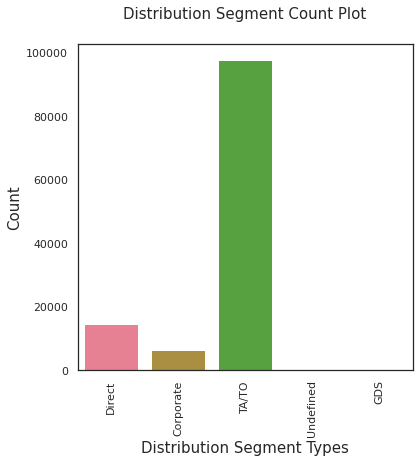

In [36]:
sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('husl')

plt.figure(figsize=(6,6))

g = sns.countplot(x ='distribution_channel', data = df)

g.set_xlabel('Distribution Segment Types',fontsize = 15)
g.set_ylabel('Count',fontsize = 15)
g.set_title('Distribution Segment Count Plot', fontsize = 15, y = 1.06)

plt.xticks(rotation = 90)

plt.show()


####4.2.11  Required Car Parking Space

#### Use value_count() method to overview Required Car Parking Space

#### We can see that around 7% customers require car parking space.

In [37]:
df['required_car_parking_spaces'].value_counts(normalize = True)

0    0.938519
1    0.061204
2    0.000235
3    0.000025
8    0.000017
Name: required_car_parking_spaces, dtype: float64

##### Visualizing Required Car Parking Space using countplot:

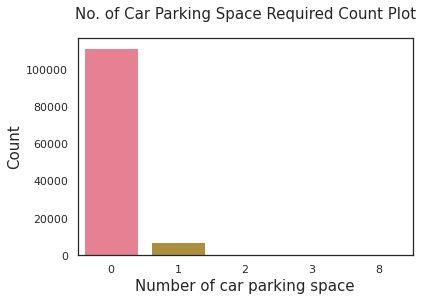

In [38]:
sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('husl')

g = sns.countplot(x ='required_car_parking_spaces', data = df)

g.set_xlabel('Number of car parking space',fontsize = 15)
g.set_ylabel('Count',fontsize = 15)
g.set_title('No. of Car Parking Space Required Count Plot', fontsize = 15, y = 1.06)


plt.show()

####4.2.12 Reservation Status

##### Many a times the guests that do reservations may or may not actually show up. Or they might cancel the reservations. Others obviously succesfully check out after their visit.

#####Let us compare these parameters of the Reservation Status in our Dataset

#####Visualizing Reservation Status using pie chart:

#####We can see that while majority cases are checkouts(62.86), there is a major chunk of cancellations(36.12), and others are No-show(1.01)

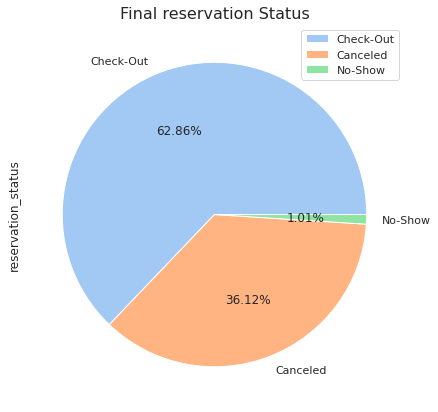

In [39]:
sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('pastel')

df['reservation_status'].value_counts().plot(kind='pie',autopct="%0.2f%%", figsize = (12,7))
plt.legend()
plt.title('Final reservation Status', fontsize=16)

plt.show()

From this visualisation we can deduce that about 62.96% are Check-outs, 36.03% guests cancelled the reservations, and 1.01% guests never showed up.

####4.2.13 Repeated Guests
##### Loyal and regular customers are essential for any thriving business. Hotel businesses are no exception.

##### Visualizing Repeated Guests using bar chart:
#####We can see that around 3% guests are repeated guests.

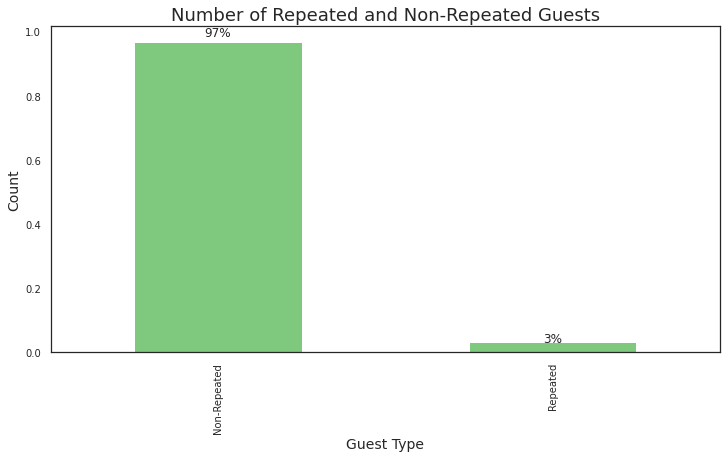

In [40]:
#Converting 0 and 1 as 'Non-Repeated' and 'Repeated' respectively
df['is_repeated_guest'].replace({0:'Non-Repeated',1:'Repeated'}, inplace= True)

sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('Accent')

a = df['is_repeated_guest'].value_counts(normalize=True).plot.bar(figsize = (12,6), fontsize = 10)

plt.title('Number of Repeated and Non-Repeated Guests', fontsize = 18)
plt.xlabel('Guest Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

for p in a.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    a.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

###4.3 Bivariate and Multivariate analysis
#### Here we analyse two or more columns together at a time and visualise the variation of trends of their data.

#### 4.3.1 Stays in Week Nights and Weekend Nights

##### Use value_count() method to overview of basis of stay type.

##### We can see that around 72% of customers stay during week nights compared to 27% who stays during week night.

In [41]:
weekend_night_stay = df['stays_in_weekend_nights'].sum()
week_night_stay = df['stays_in_week_nights'].sum()

print(f'Weekend_night_stay % : {weekend_night_stay *100/(weekend_night_stay + week_night_stay)}')
print(f'Week_night_stay % : {week_night_stay *100/(weekend_night_stay + week_night_stay)}')

Weekend_night_stay % : 27.50290336790677
Week_night_stay % : 72.49709663209323


##### Visualizing Stay Type using countplot:
 
##### As we can see from below plot that more than 50% customers prefer Week Stay compared to Weekend Stay.

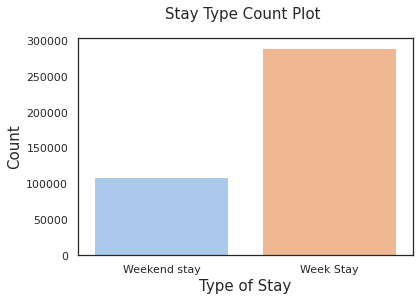

In [42]:
stay_df = pd.DataFrame({'stay':['Weekend stay','Week Stay'], 'period':[weekend_night_stay,week_night_stay]})

sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('pastel')

g = sns.barplot(x='stay', y ='period', data = stay_df)

g.set_xlabel('Type of Stay',fontsize = 15)
g.set_ylabel('Count',fontsize = 15)
g.set_title('Stay Type Count Plot ', fontsize = 15, y = 1.06)
plt.show()

####4.3.2 Market Segment and Hotel Type

##### Use value_count() method to overview Market Segment

##### We can see that there are total 7 types of market segments 'Online TA','Offline TA/TO','Groups','Direct','Corporate','Complementary' and 'Aviation 

In [43]:
df['market_segment'].value_counts(normalize = True)

Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

#####Visualizing Market segment vs Hotel type using countplot:

Text(0, 0.5, 'Count')

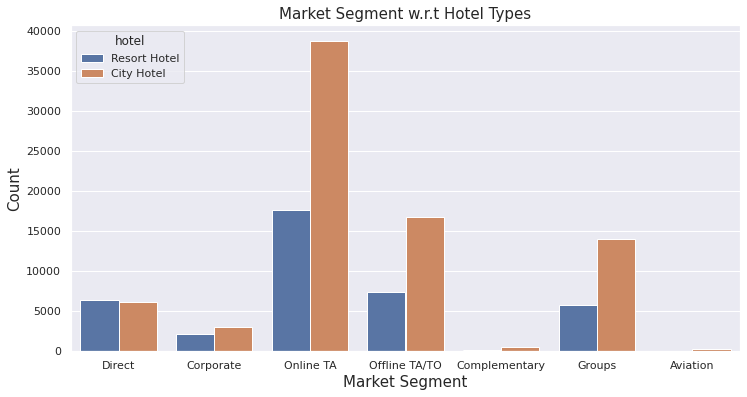

In [44]:
sns.set_context('notebook')
sns.set_style("whitegrid")
sns.set_palette('pastel')
sns.set(rc={'figure.figsize':(12,6)})

a = sns.countplot(x ='market_segment',hue='hotel', data = df)

a.set_title('Market Segment w.r.t Hotel Types', fontsize = 15)
a.set_xlabel('Market Segment',fontsize = 15)
a.set_ylabel('Count',fontsize = 15)

####4.3.3 Average Daily Rate(ADR) and Month

##### We can see that 'Resort' average daily price is very fluctuating(more variation) compared to 'Hotel' which is stable(less variation).

##### Visualizing ADR vs Month using lineplot:

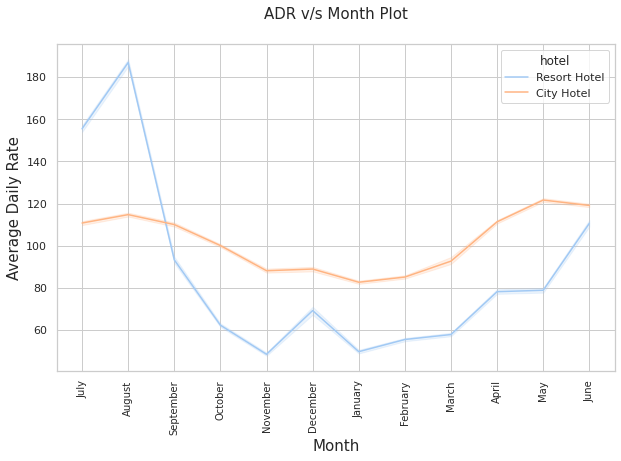

In [45]:
sns.set_context('notebook')
sns.set_style("whitegrid")
sns.set_palette('pastel')

plt.figure(figsize = (10,6))
g = sns.lineplot(x = 'arrival_date_month', y = 'adr', data = df, hue = 'hotel')

g.set_xlabel('Month',fontsize = 15)
g.set_ylabel('Average Daily Rate',fontsize = 15)
g.set_title('ADR v/s Month Plot', fontsize = 15, y = 1.06)

plt.xticks(rotation = 90, fontsize = 10)
plt.show()

#5. Asking and answering questions

#### Q1: What is the relationship between lead time and cancellation?


The Booking Lead Time is the number of days between the time a guest books their room and the time they are scheduled to arrive at the hotel.

Text(0.5, 1.06, 'Lead Time v/s Cancellation')

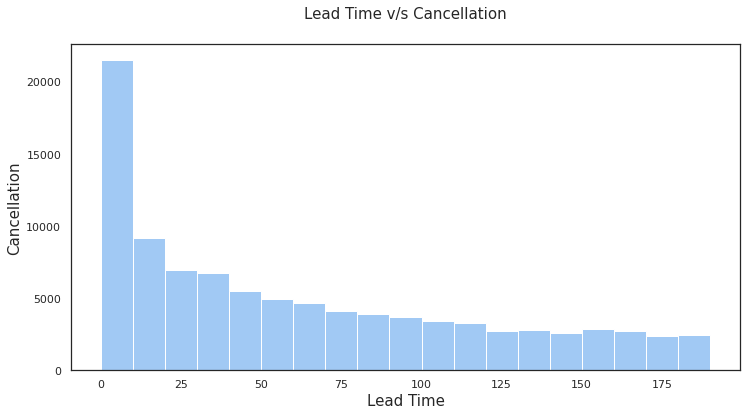

In [46]:
sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('pastel')

plt.hist (df.lead_time, bins= np.arange(0,200,10))

plt.xlabel('Lead Time',fontsize = 15)
plt.ylabel('Cancellation',fontsize = 15)
plt.title('Lead Time v/s Cancellation', fontsize = 15, y = 1.06)

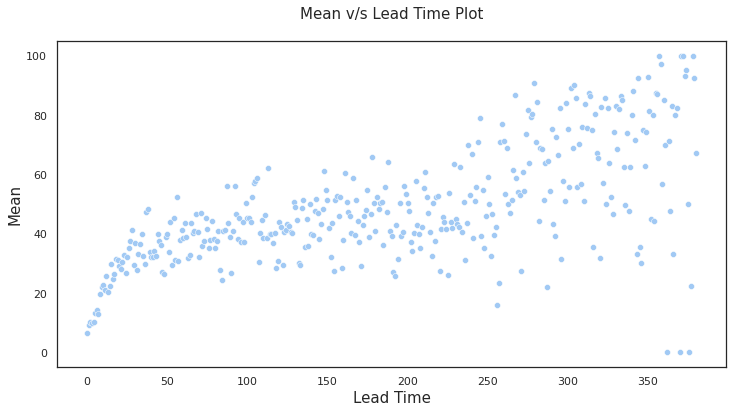

In [47]:
sns.set_context('notebook')
sns.set_style("white")
sns.set_palette('pastel')

g = df_copy.groupby('lead_time')['is_canceled'].describe()
a = sns.scatterplot(x = g.index, y = g['mean']*100)
a.set_title('Mean v/s Lead Time Plot', fontsize = 15, y = 1.05)
a.set_ylabel('Mean',fontsize = 15)
a.set_xlabel('Lead Time',fontsize = 15)



plt.show()

####Q2: Which is the most reserved room type and Least reserved room type?

Room type 'A' is the most reserved room with 71.99% and room type 'B' is the least reserved room type.

In [48]:

df['reserved_room_type'].value_counts(normalize = True)

A    0.719953
D    0.161256
E    0.054643
F    0.024307
G    0.017519
B    0.009369
C    0.007830
H    0.005055
L    0.000050
P    0.000017
Name: reserved_room_type, dtype: float64

####Q3: How many total customers have registered in hotel?

Total 234294 customers have registered them in hotel.

In [49]:
df['total_guests'].sum()

234294

####Q4: How many Car Parking spaces used in total?

We can see total 7358 car parking spaces required.

In [50]:
df['required_car_parking_spaces'].sum()

7358

####Q5: Which are the months of Highest and Lowest Customer arrival count?

We can see that 'August' is the month of Highest and 'January' is the month of Lowest Customer Arrival count with 11.6% and 4.9% respectively

In [51]:
df.arrival_date_month.value_counts(normalize=True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: arrival_date_month, dtype: float64

####Q6 Which is the most common and least common customer type?

'Transient' customer is the most common and 'Group' is the least common customer type with 75% and 0.47% respectively.

In [52]:
df.customer_type.value_counts(normalize=True)

Transient          0.750004
Transient-Party    0.210920
Contract           0.034281
Group              0.004794
Name: customer_type, dtype: float64

####Q7: Which are the most common countries of origin?

In [53]:
print('Most common countries:')
print(df.country.value_counts().head(3))
print('-'*50)
print('\n Most uncommon countries:')
print(df.country.value_counts().tail(35))

Most common countries:
PRT    48586
GBR    12129
FRA    10415
Name: country, dtype: int64
--------------------------------------------------

 Most uncommon countries:
TGO    2
UGA    2
KNA    2
RWA    2
SYC    2
KIR    1
SDN    1
NCL    1
AIA    1
ASM    1
FJI    1
ATF    1
LCA    1
GUY    1
PYF    1
DMA    1
SLE    1
MRT    1
NIC    1
BDI    1
PLW    1
MLI    1
CYM    1
BFA    1
MDG    1
MMR    1
NPL    1
BHS    1
UMI    1
SMR    1
DJI    1
BWA    1
HND    1
VGB    1
NAM    1
Name: country, dtype: int64


As we can see, Portugal tops the list with 48,586 of the cases, followed by Great Britain with 12,129 and France with 10,415.